# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images
* Apply a distortion correction to raw images
* Use color transforms, gradients, etc., to create a thresholded binary image
* Apply a perspective transform to rectify binary image ("birds-eye view")
* Detect lane pixels and fit to find the lane boundary
* Determine the curvature of the lane and vehicle position with respect to center
* Warp the detected lane boundaries back onto the original image
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position

---

## Package import

In [1]:
import numpy as np
import cv2
import glob
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Image import

In [2]:
files_calibration = glob.glob('./camera_cal/calibration*.jpg')
files_straight = glob.glob('./test_images/straight_lines*.jpg')
files_test = glob.glob('./test_images/test*.jpg')
files_hard = glob.glob('./test_images/vlcsnap*.png')

images_calibration=[]
images_straight=[]
images_test=[]
images_hard=[]

for fname in files_calibration:
    img = cv2.imread(fname)
    images_calibration.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

for fname in files_straight:
    img = cv2.imread(fname)
    images_straight.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

for fname in files_test:
    img = cv2.imread(fname)
    images_test.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

for fname in files_hard:
    img = cv2.imread(fname)
    images_hard.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Chessboard images

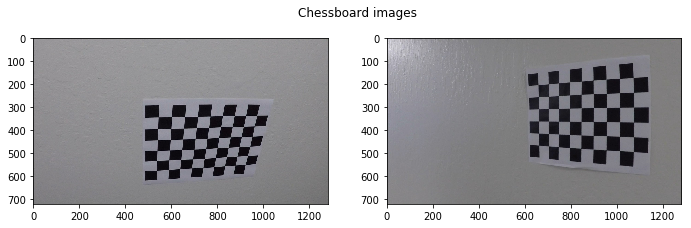

In [3]:
f, axarr = plt.subplots(1, 2, figsize=(9, 3))
f.suptitle('Chessboard images')
axarr[0].imshow(images_calibration[1])
axarr[1].imshow(images_calibration[3])
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Camera calibration

In [4]:
from camera_correction import CameraCorrection

cc = CameraCorrection()
cc.find_corners(files_calibration)
cc.calibrate_camera()

## Distortion correction

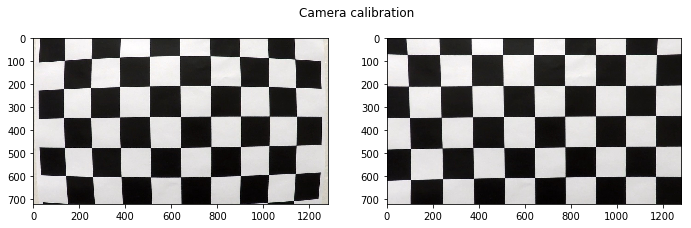

In [5]:
images_calibration_undistorted = cc.undistort_images(images_calibration)

f, axarr = plt.subplots(1, 2, figsize=(9, 3))
f.suptitle('Camera calibration')
axarr[0].imshow(images_calibration[0])
axarr[1].imshow(images_calibration_undistorted[0])
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

images_straight_undistorted = cc.undistort_images(images_straight)
images_test_undistorted = cc.undistort_images(images_test)
images_hard_undistorted = cc.undistort_images(images_hard)

## Use color transforms, gradients, etc., to create a thresholded binary image

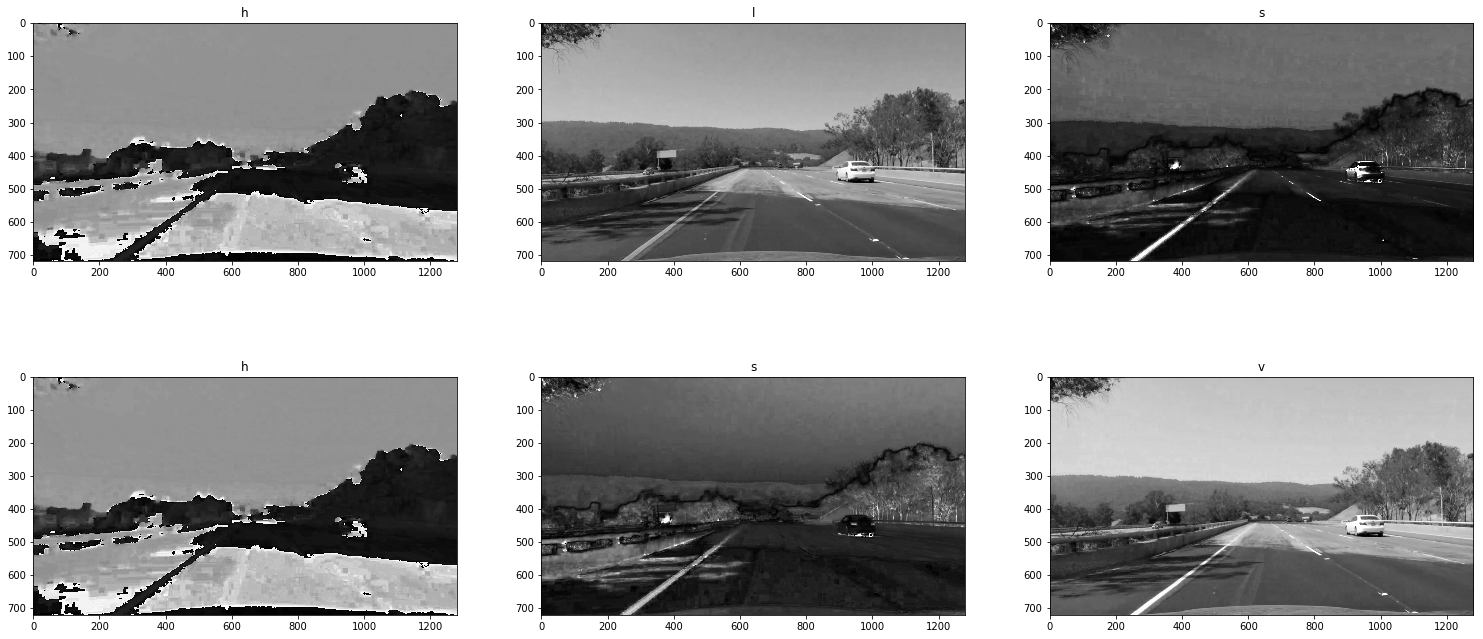

In [6]:
hls = cv2.cvtColor(images_hard_undistorted[0], cv2.COLOR_RGB2HLS).astype(np.float)
hsv = cv2.cvtColor(images_hard_undistorted[0], cv2.COLOR_RGB2HSV).astype(np.float)
f, axarr = plt.subplots(2, 3, figsize=(20, 10))
axarr[0, 0].imshow(hls[:,:,0], cmap='gray')
axarr[0, 0].set_title('h')
axarr[0, 1].imshow(hls[:,:,1], cmap='gray')
axarr[0, 1].set_title('l')
axarr[0, 2].imshow(hls[:,:,2], cmap='gray')
axarr[0, 2].set_title('s')
axarr[1, 0].imshow(hsv[:,:,0], cmap='gray')
axarr[1, 0].set_title('h')
axarr[1, 1].imshow(hsv[:,:,1], cmap='gray')
axarr[1, 1].set_title('s')
axarr[1, 2].imshow(hsv[:,:,2], cmap='gray')
axarr[1, 2].set_title('v')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

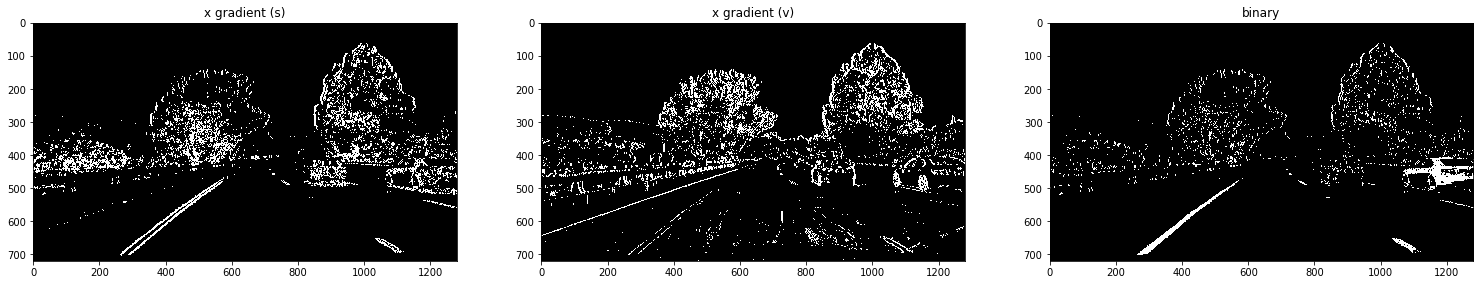

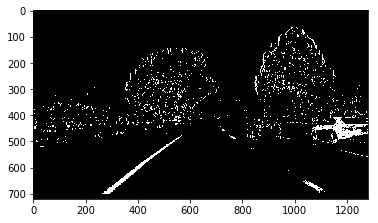

In [23]:
from image_transforms import ImageTransforms

test0 = ImageTransforms(images_straight_undistorted)
for image in images_test_undistorted:
    f, axarr = plt.subplots(1, 3, figsize=(20, 10))
    axarr[ 0].imshow(test0.binary_threshold(image, choose='sx_binary'), cmap='gray')
    axarr[ 0].set_title('x gradient (s)')
    axarr[ 1].imshow(test0.binary_threshold(image, choose='vx_binary'), cmap='gray')
    axarr[ 1].set_title('x gradient (v)')
    axarr[ 2].imshow(test0.binary_threshold(image), cmap='gray')
    axarr[ 2].set_title('binary')
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    plt.imshow(test0.binary_threshold(image), cmap='gray')
    break

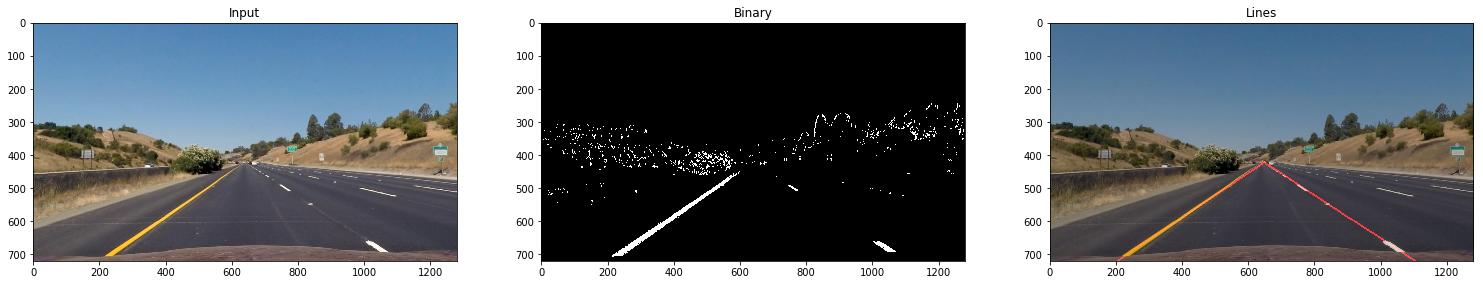

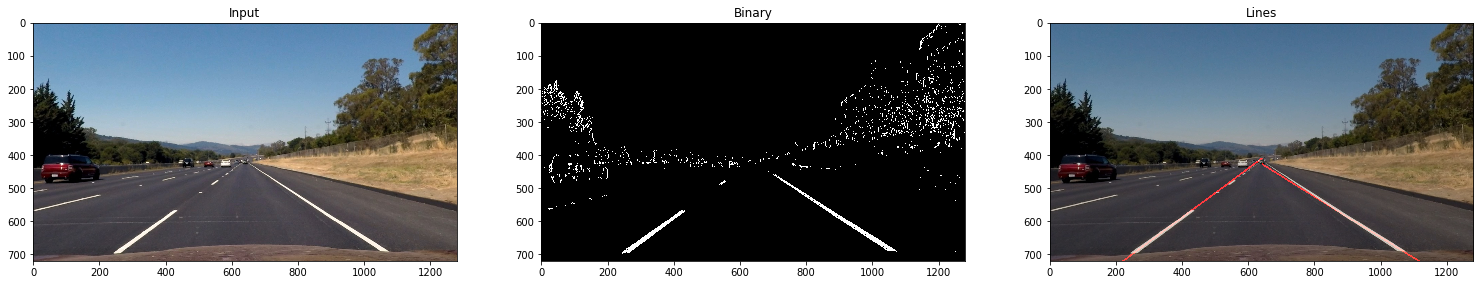

In [8]:
test1 = ImageTransforms(images_straight_undistorted)
for image in images_straight_undistorted:
    f, axarr = plt.subplots(1, 3, figsize=(20,10))
    axarr[0].imshow(image)
    axarr[0].set_title('Input')
    axarr[1].imshow(test1.pipeline(image, choose='binary'), cmap='gray')
    axarr[1].set_title('Binary')
    axarr[2].imshow(test1.pipeline(image, choose=''), cmap='gray')
    axarr[2].set_title('Lines')
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

## Apply a perspective transform to rectify binary image

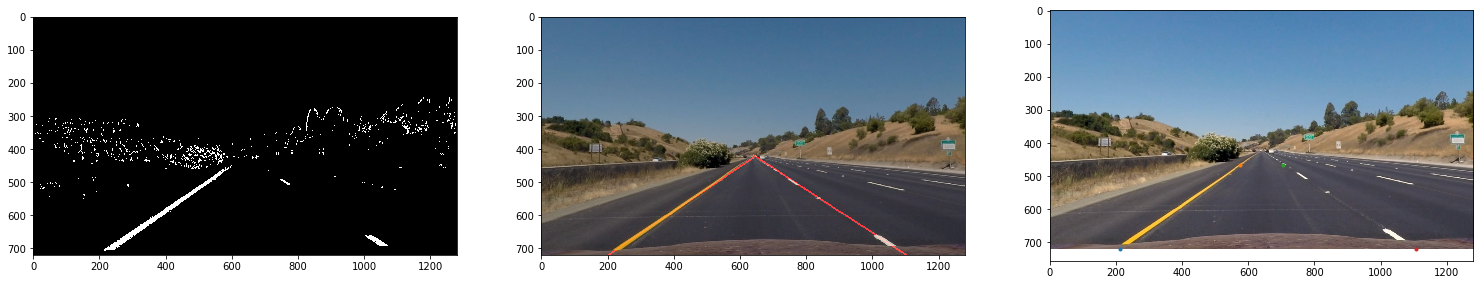

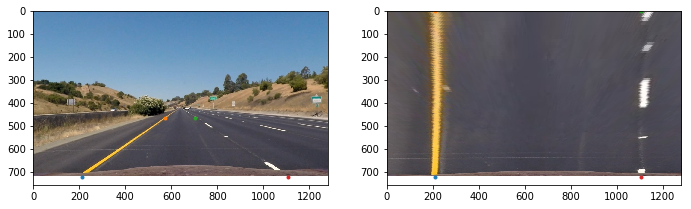

In [27]:
test2 = ImageTransforms(images_straight_undistorted)
for image in images_straight_undistorted:
    lines = test2.pipeline(image, choose='lines')
    binary = test2.pipeline(image, choose='binary')

    # Visualise undistortion
    f1, axarr = plt.subplots(1, 3, figsize=(20,10))
    axarr[2].imshow(image)
    axarr[2].plot(test2._x_bl, test2._y_bl, '.')
    axarr[2].plot(test2._x_tl, test2._y_tl, '.')
    axarr[2].plot(test2._x_tr, test2._y_tr, '.')
    axarr[2].plot(test2._x_br, test2._y_br, '.')
    axarr[1].imshow(lines)
    axarr[0].imshow(binary, cmap='gray')
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

    f3, axarr = plt.subplots(1, 2, figsize=(9,3))
    axarr[0].imshow(image)
    axarr[0].plot(test2._x_bl, test2._y_bl, '.')
    axarr[0].plot(test2._x_tl, test2._y_tl, '.')
    axarr[0].plot(test2._x_tr, test2._y_tr, '.')
    axarr[0].plot(test2._x_br, test2._y_br, '.')
    axarr[1].imshow(test2.perspective_transform(image))
    axarr[1].plot(test2._x_bl, test2._y_bl, '.')
    axarr[1].plot(test2._x_bl, 0, '.')
    axarr[1].plot(test2._x_br, 0, '.')
    axarr[1].plot(test2._x_br, test2._y_br, '.')
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    break

    f2, axarr = plt.subplots(1, 3, figsize=(20,10))
    axarr[0].imshow(test2.perspective_transform(image))
    axarr[1].imshow(test2.perspective_transform(lines))
    axarr[2].imshow(test2.perspective_transform(binary), cmap='gray')
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    break

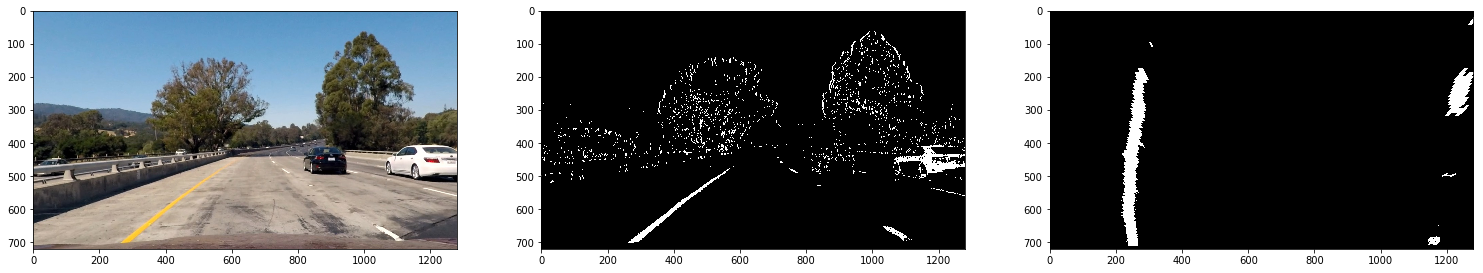

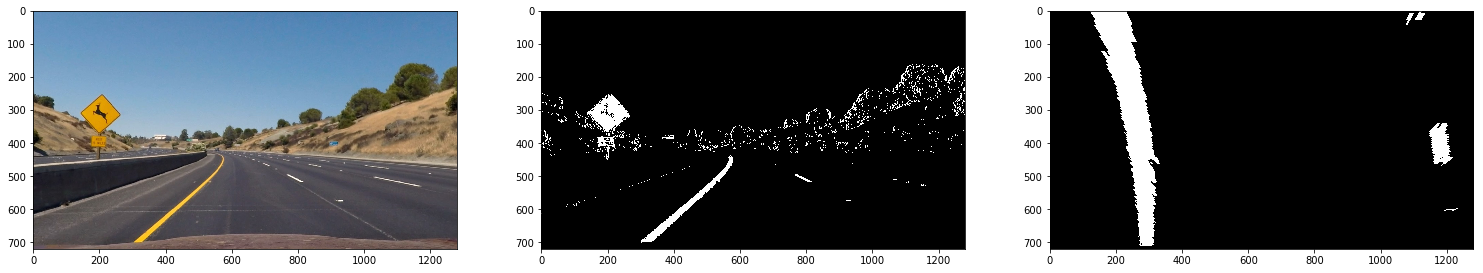

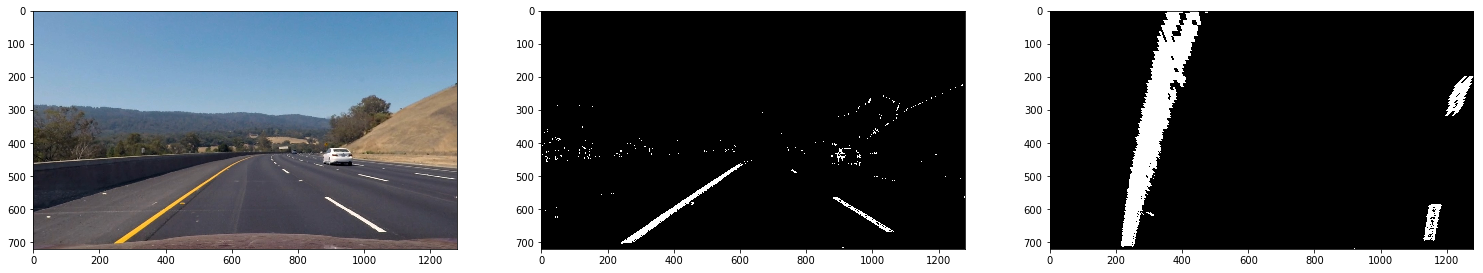

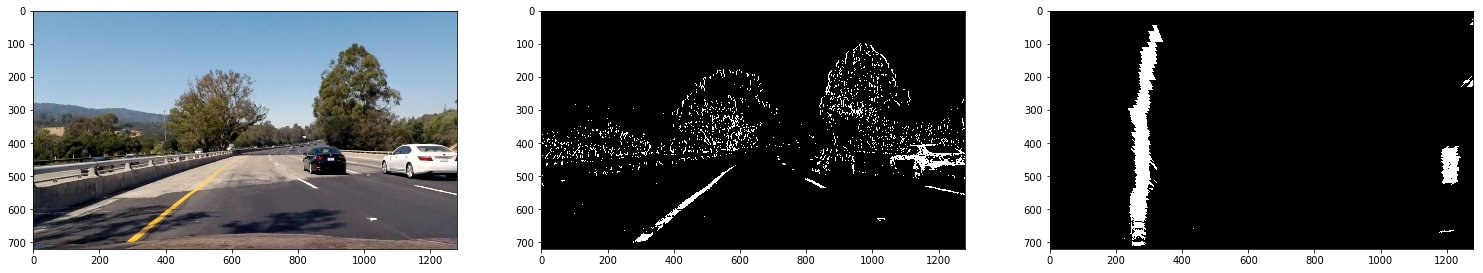

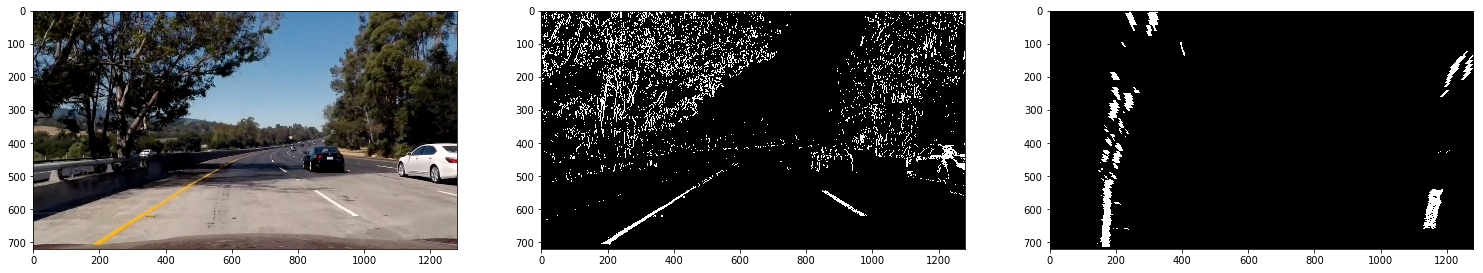

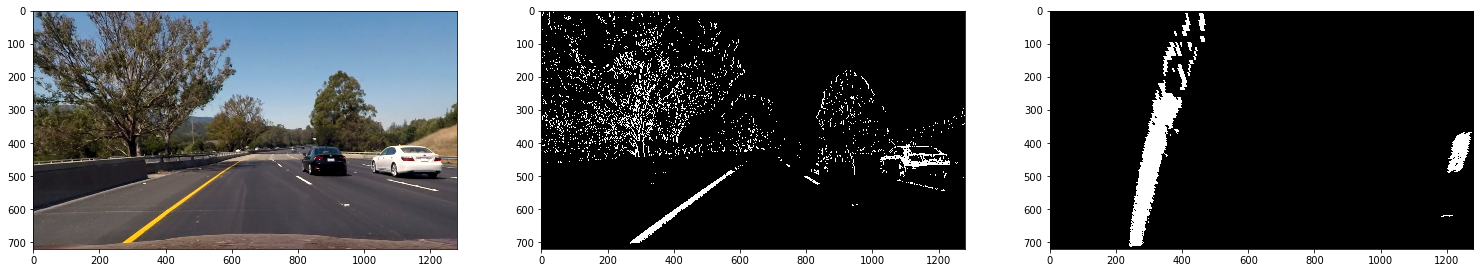

In [33]:
test3 = ImageTransforms(images_straight_undistorted)
for image in images_test_undistorted:
    binary = test3.pipeline(image, choose='binary')

    f, axarr = plt.subplots(1, 3, figsize=(20,10))
    axarr[1].imshow(binary, cmap='gray')
    axarr[0].imshow(image)
    axarr[2].imshow(test3.perspective_transform(binary), cmap='gray')
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

## Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position

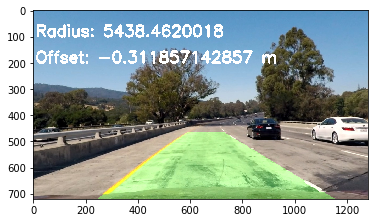

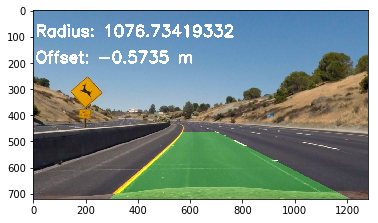

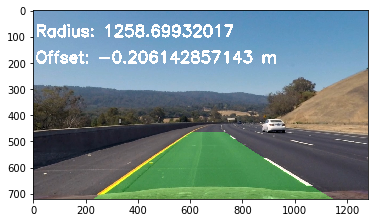

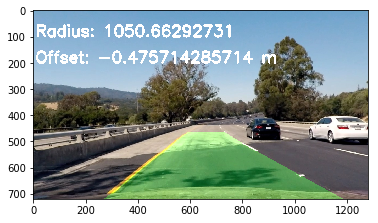

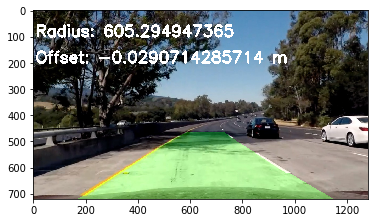

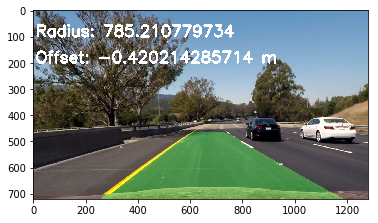

In [11]:
from line_tracking import LineTracking
import helper_functions as hf

def test_on_image(image, tracker):
    binary = tracker.image_transforms.pipeline(image)
    binary_warped = tracker.image_transforms.perspective_transform(binary)
    warped = tracker.image_transforms.perspective_transform(image)
    tracker.sliding_window_simple(binary_warped)
    tracker.measure_curvature()
    image = tracker.warp_lanes_back(image)
    image = tracker.text(image, "Radius: "+str(tracker.radius_of_curvature), 100)
    image = tracker.text(image, "Offset: "+str(tracker.line_base_pos)+' m', 200)
    hf.visualise(image, '', 1, 1)

test4 = ImageTransforms(images_straight_undistorted)
tracker4 = LineTracking(test4)

for image in images_test_undistorted:
    test_on_image(image, tracker4)


## Process video stream

In [12]:
line_tracking=LineTracking(ImageTransforms(images_straight_undistorted),smoothing_buffer_size=7)
def process_frame(image):
    line_tracking.nframe+=1
    undistorted = cc.undistort_image(image)
    binary = line_tracking.image_transforms.pipeline(image)
    binary_warped = line_tracking.image_transforms.perspective_transform(binary)
    line_tracking.sliding_window_simple(binary_warped)
    if line_tracking.nframe%15==0:
        line_tracking.measure_curvature()
    image = line_tracking.text(image, "Radius: "+str(line_tracking.radius_of_curvature), 100)
    image = line_tracking.text(image, "Offset: "+str(line_tracking.line_base_pos)+' m', 200)
    return line_tracking.warp_lanes_back(image)

In [17]:
video_output = './project_video_lane_detection.mp4'
clip1 = VideoFileClip("./project_video.mp4")
video_clip = clip1.fl_image(process_frame).subclip()
%time video_clip.write_videofile(video_output, audio=False)

#close file to prevent bad handle error when attempting to re-process
clip1.reader.close()
clip1.audio.reader.close_proc()
video_clip.reader.close()
video_clip.audio.reader.close_proc()

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))

[MoviePy] >>>> Building video ./project_video_lane_detection.mp4
[MoviePy] Writing video ./project_video_lane_detection.mp4


100%|████████████████████████████████████████████████████████████████▉| 1260/1261 [06:27<00:00,  3.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_lane_detection.mp4 

Wall time: 6min 28s
